# Decision Boundary for Naive Bayes

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sys
from pathlib import Path
parent_dir = str(Path().resolve().parents[2])
sys.path.append(parent_dir)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from src.generative.naive_bayes.naive_bayes import (
    NaiveBayesGaussian,
    NaivesBayesHyperParams,
)
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs, make_classification
from src.generative.naive_bayes.decision_boundary import plot_decision_regions

In [78]:
np.random.seed(42)

/var/folders/sf/x4vl5wys1w1_pvy5ts9vxc640000gp/T/ipykernel_68987/3052314607.py:6: RuntimeWarning: invalid value encountered in sqrt
  return 4 - np.sqrt(-x_1**2 + 4*x_1 + 6 + np.log(16))


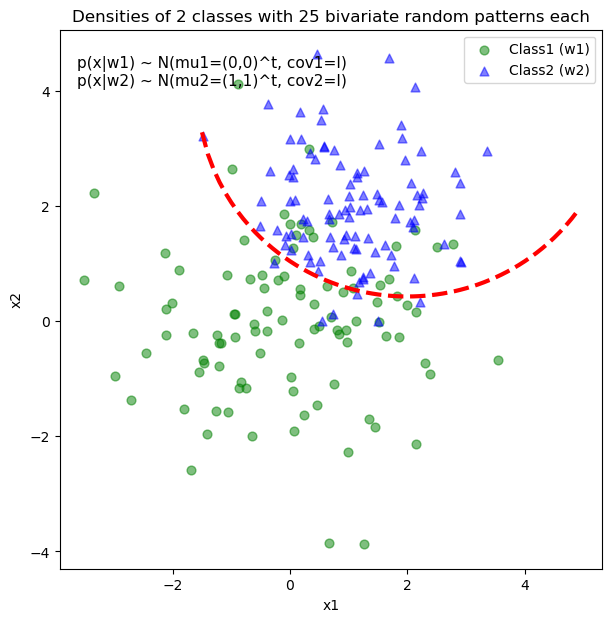

In [86]:
import numpy as np
from matplotlib import pyplot as plt

def decision_boundary(x_1):
    """ Calculates the x_2 value for plotting the decision boundary."""
    return 4 - np.sqrt(-x_1**2 + 4*x_1 + 6 + np.log(16))

# Generating a Gaussion dataset:
# creating random vectors from the multivariate normal distribution 
# given mean and covariance 
mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

mu_vec2 = np.array([1,2])
cov_mat2 = np.array([[1,0],[0,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1,2).T # to 1-col vector

# Main scatter plot and plot annotation
f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x1_samples[:,0], x1_samples[:,1], marker='o', color='green', s=40, alpha=0.5)
ax.scatter(x2_samples[:,0], x2_samples[:,1], marker='^', color='blue', s=40, alpha=0.5)
plt.legend(['Class1 (w1)', 'Class2 (w2)'], loc='upper right') 
plt.title('Densities of 2 classes with 25 bivariate random patterns each')
plt.ylabel('x2')
plt.xlabel('x1')
ftext = 'p(x|w1) ~ N(mu1=(0,0)^t, cov1=I)\np(x|w2) ~ N(mu2=(1,1)^t, cov2=I)'
plt.figtext(.15,.8, ftext, fontsize=11, ha='left')

# Adding decision boundary to plot
x_1 = np.arange(-5, 5, 0.1)
bound = decision_boundary(x_1)
plt.plot(x_1, bound, 'r--', lw=3)

x_vec = np.linspace(*ax.get_xlim())
x_1 = np.arange(0, 100, 0.05)

plt.show()

In [89]:
x1_samples.shape, x2_samples.shape

((100, 2), (100, 2))

In [2]:
X, y = make_blobs(n_samples=[50, 50], n_features=2, centers=None, cluster_std=1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [82]:
X11 = np.random.normal(0, 2, 2500) # class 1 feature 1
X12 = np.random.normal(0, 2, 2500) # class 1 feature 2
X21 = np.random.normal(1, 1, 2500) # class 2 feature 1
X22 = np.random.normal(1, 2, 2500) # class 2 feature 2
X1 = np.concatenate((X11, X21))
X2 = np.concatenate((X12, X22))
print(X11[0], X12[0], X21[0], X22[0])
print(X11[1], X12[1], X21[1], X22[1])
X = np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1)))
print(X.shape)
print(X[0], X[1])
y = np.array([0] * 2500 + [1] * 2500)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

-2.8307414841008285 -3.753105412083748 2.0287689914234805 0.7422452426224928
-0.8412906455307181 1.2394228919322725 1.5016850451687882 -0.018187610623138895
(5000, 2)
[-2.83074148 -3.75310541] [-0.84129065  1.23942289]


In [83]:
hparams = {
    "random_state": 1992,
    "num_classes": 2,
}
naives_bayes_hyperparams = NaivesBayesHyperParams.from_dict(hparams)

gnb = NaiveBayesGaussian(naives_bayes_hyperparams)
gnb.fit(X, y)

y_preds = gnb.predict(X)

report = classification_report(
    y,
    y_preds,
    labels=[0, 1],
)
print(f"Classification report: \n{report}")
print()
print(f"Mislabeled points: {(y_preds != y).sum()}/{X.shape[0]}")


Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.60      0.67      2500
           1       0.67      0.80      0.73      2500

    accuracy                           0.70      5000
   macro avg       0.71      0.70      0.70      5000
weighted avg       0.71      0.70      0.70      5000


Mislabeled points: 1481/5000


In [84]:
gnb.theta

array([[[ 0.07921931,  3.91703268],
        [-0.04605303,  4.04648378]],

       [[ 0.96692676,  1.0496981 ],
        [ 1.02354873,  3.94272414]]])

In [66]:
hparams = {
    "random_state": 1992,
    "num_classes": 2,
}
naives_bayes_hyperparams = NaivesBayesHyperParams.from_dict(hparams)

gnb = NaiveBayesGaussian(naives_bayes_hyperparams)
gnb.fit(X_train, y_train)

y_preds = gnb.predict(X_test)

report = classification_report(
    y_test,
    y_preds,
    labels=[0, 1],
)
print(f"Classification report: \n{report}")
print()
print(f"Mislabeled points: {(y_preds != y_test).sum()}/{X_test.shape[0]}")


Classification report: 
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.90      0.82      0.86        11

    accuracy                           0.80        15
   macro avg       0.75      0.78      0.76        15
weighted avg       0.82      0.80      0.81        15


Mislabeled points: 3/15


In [69]:
gnb.theta

array([[[-0.44003237,  3.20513817],
        [-0.47827546,  3.52910081]],

       [[ 1.00259251,  0.88101676],
        [ 0.69897151,  1.54579323]]])

In [ ]:
def analytic_decision_boundary(x, theta, sigma):
    x_1, x_2 = x
    return 0.5 * (x1 - theta[0, 0]) ** 2 / sigma[0, 0] + 0.5 * (y - theta[0, 1]) ** 2 / sigma[0, 1] - 0.5 * (
        x - theta[1, 0]
    ) ** 2 / sigma[1, 0] - 0.5 * (y - theta[1, 1]) ** 2 / sigma[1, 1]

In [ ]:
decision_boundary_equation = lambda x: (gnb.theta[0, 0] - gnb.theta[1, 0]) / (gnb.theta[0, 1] - gnb.theta[1, 1]) * x + (gnb.theta[0, 2] - gnb.theta[1, 2]) / (gnb.theta[0, 1] - gnb.theta[1, 1])
decision_boundary_equation(np.array([1, 2]))



IndexError: index 2 is out of bounds for axis 1 with size 2

In [ ]:
def func(x1, x2):
    return x1**2 + x2**2 + 2*x1 + 4*x2 + np.log(2) - 5



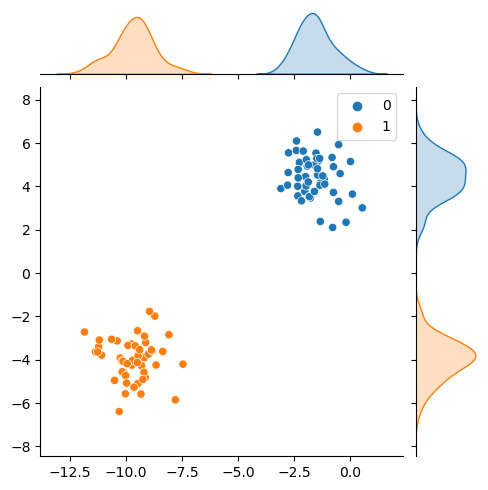

In [ ]:
sns.jointplot(x=X[:, 0], y=X[:, 1], data=X, hue=y, height=5)

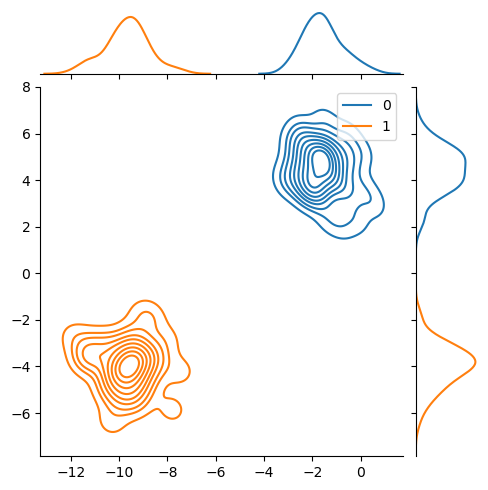

In [ ]:
sns.jointplot(x=X[:, 0], y=X[:, 1], data=X, hue=y, height=5, kind="kde")

-7.482534680138145 8.705462981309442 -7.8448005032366845 8.852475412872653
[[-7.48253468 -7.46253468 -7.44253468 ...  8.65746532  8.67746532
   8.69746532]
 [-7.48253468 -7.46253468 -7.44253468 ...  8.65746532  8.67746532
   8.69746532]
 [-7.48253468 -7.46253468 -7.44253468 ...  8.65746532  8.67746532
   8.69746532]
 ...
 [-7.48253468 -7.46253468 -7.44253468 ...  8.65746532  8.67746532
   8.69746532]
 [-7.48253468 -7.46253468 -7.44253468 ...  8.65746532  8.67746532
   8.69746532]
 [-7.48253468 -7.46253468 -7.44253468 ...  8.65746532  8.67746532
   8.69746532]] [[-7.8448005 -7.8448005 -7.8448005 ... -7.8448005 -7.8448005 -7.8448005]
 [-7.8248005 -7.8248005 -7.8248005 ... -7.8248005 -7.8248005 -7.8248005]
 [-7.8048005 -7.8048005 -7.8048005 ... -7.8048005 -7.8048005 -7.8048005]
 ...
 [ 8.7951995  8.7951995  8.7951995 ...  8.7951995  8.7951995  8.7951995]
 [ 8.8151995  8.8151995  8.8151995 ...  8.8151995  8.8151995  8.8151995]
 [ 8.8351995  8.8351995  8.8351995 ...  8.8351995  8.8351995  8

/Users/gaohn/gao/gaohn-probability-stats/src/generative/naive_bayes/decision_boundary.py:74: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


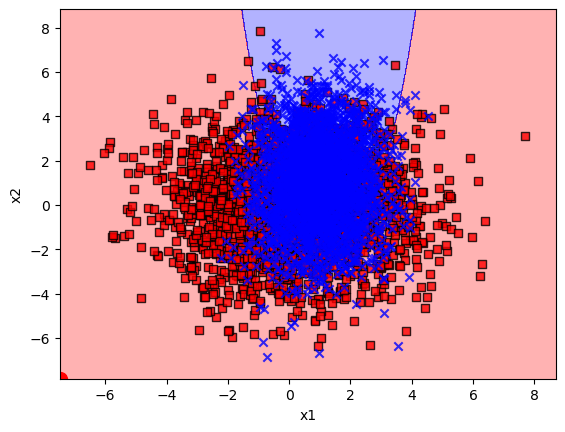

In [85]:
plot_decision_regions(X, y, classifier=gnb)